In [99]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [100]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [101]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [102]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [103]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [104]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [105]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [106]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [107]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent

'2017-08-23'

In [108]:
prev_year = dt.date(2017, 8 ,23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

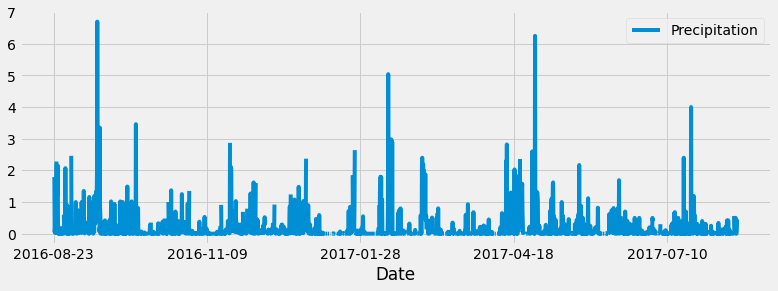

In [142]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

recent_dp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year).\
    filter(Measurement.date <= most_recent).all()
  
recent_dp

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_data = pd.DataFrame(recent_dp, columns=['Date', 'Precipitation'])
prcp_data.set_index(prcp_data['Date'], inplace=True)

# Sort the dataframe by date
prcp_data = prcp_data.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_data.plot(figsize=(12,4))




In [143]:
renamed_df = prcp_data.rename(columns={'prcp':'Precipitation'})
renamed_df.dropna()

,Date,Precipitation
Date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.70
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [144]:
# Use Pandas to calcualte the summary statistics for the precipitation data
renamed_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [145]:
# Design a query to calculate the total number stations in the dataset
total = session.query(Station).count()
total

9

In [146]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_act = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [147]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = "USC00519281"
station_most_act = session.query(func.min(Measurement.tobs),
func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == station_id).all()
station_most_act

[(54.0, 85.0, 71.66378066378067)]

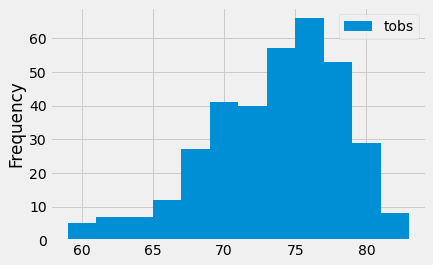

In [148]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= prev_year).\
filter(Measurement.date <= most_recent).\
filter(Measurement.station == station_id)

finish = pd.DataFrame(year_temp)
finish.plot.hist(bins=12)

# Close session

In [149]:
# Close Session
session.close()